<a href="https://colab.research.google.com/github/HaiTMai/Time-Series-Forecast/blob/master/GluonTS_DeepAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# HaiMai: Google Colab, Hardware Accelerate: None

!pip install mxnet-cu100
!pip show mxnet
!nvcc --version # Show Nvidia GPU Version
!pip install gluonts

!pip install --upgrade numpy
!pip install --upgrade spacy 
!pip install --upgrade imgaug 
!pip install --upgrade fastai 

!pip install --upgrade datascience 
!pip install --upgrade blis 
!pip install --upgrade albumentations 
!pip install --upgrade plotly==4.0.0
# Need to restart runtime after installation


In [8]:
from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.trainer import Trainer
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd

url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)
data = common.ListDataset([{"start": df.index[0],
                            "target": df.value[:"2015-04-05 00:00:00"]}],
                          freq="5min")

fig = go.Figure(data=go.Scatter(x=df.index, y=df.value))
fig.show()
#df.plot()

In [0]:
print(df.value[:"2015-04-05 00:00:00"])

In [9]:
#HaiMai:Train the network with DeepAR Estimator(Deep Autogression Recurrent Net)
estimator = deepar.DeepAREstimator(freq="5min", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=data)

# HaiMai : Prediction the far and unconsecutive timestamp with training data
prediction = next(predictor.predict(data))

INFO:root:Start model training
INFO:root:Number of parameters in DeepARTrainingNetwork: 13463
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.98it/s, avg_epoch_loss=4.39]
INFO:root:Epoch[0] Elapsed time 7.167 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.394293
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.24it/s, avg_epoch_loss=4.06]
INFO:root:Epoch[1] Elapsed time 6.909 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=4.060105
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.93it/s, avg_epoch_loss=4.04]
INFO:root:Epoch[2] Elapsed time 7.230 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=4.040484
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.54it/s, avg_epoch_loss=4]
INFO:root:Epoch[3] Elapsed time 6.636 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=3.999899
INFO:root:Epoch[4] Learning rate is 0.001
100

[52.605743 51.923653 48.097958 44.044266 44.216164 45.464184 42.97411
 45.644012 44.84357  43.86115  46.28851  47.131344]

Number_samples and Prediction Length: (100, 12)

Verify Mean Sample Again:
 [52.605743 51.923653 48.097958 44.044266 44.216164 45.464184 42.97411
 45.644012 44.84357  43.86115  46.28851  47.131344]


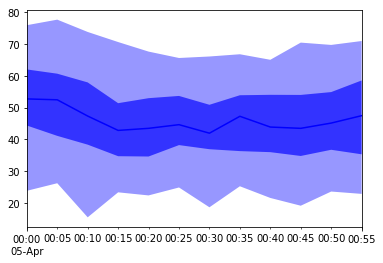

In [10]:
print(prediction.mean)

# Show (Number_Samples, Prediction Length)
print('\nNumber_samples and Prediction Length:', prediction.samples.shape)
print('\nVerify Mean Sample Again:\n', np.mean(prediction.samples, axis=0))

prediction.plot(output_file='graph.png')

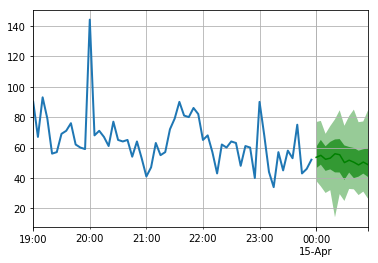

In [11]:
# HaiMai : Prediction the far and unconsecutive timestamp with training data
# predictor.predict function returns SampleForecast object
# Question: How to get prediction_intervals data? 
# => ANS:by prediction_intervals param

test_data = common.ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')